# HR Analytics Challenge 

### 1. Problem Statement
To try predictive analytics in identifying the employees most likely to get promoted.

### 2. Data
Data is taken from Analytics problem practice - [HR Analytics](https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#DiscussTab)

### 3. Evaluation
The evaluation metric for this competition is F1 Score.

### 4. Feature

 - employee_id - Unique ID for employee
 - department - Department of employee
 - region - Region of employment (unordered)
 - education - Education Level
 - gender - Gender of Employee
 - -recruitment_channel - Channel of recruitment for employee
 - no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.
 - age - Age of Employee
 - previous_year_rating - Employee Rating for the previous year
 - length_of_service - Length of service in years
 - KPIs_met >80% - if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
 - awards_won? - if awards won during previous year then 1 else 0
 - avg_training_score - Average score in current training evaluations
 - is_promoted	(Target) - Recommended for promotion



### Getting Started

In [6]:
!pip install imblearn

In [7]:
!pip install delayed

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data = pd.read_csv('train.csv')

In [10]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Exploratory data analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [13]:
#checking for any null values
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

So we have some null values.

In [14]:
#checking for datatypes
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

We also have 5 columns that are not numerical.

#### Filling Missing Values

In [15]:
category_columns=data.select_dtypes(include=['object']).columns.tolist()
numerical_columns=data.select_dtypes(include=['int64','float64']).columns.tolist()

for column in data:
    if data[column].isnull().any():
        if(column in category_columns):
            data[column]=data[column].fillna(data[column].mode()[0])
        else:
            data[column]=data[column].fillna(data[column].median())

In [16]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Converting Categorical columns into numerical with Ordinal Encoding

In [17]:
category_columns

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [18]:
#let's make the copy of data
data_tmp = data.copy()

In [19]:
from sklearn.preprocessing import OrdinalEncoder

scaler = OrdinalEncoder()

data_tmp[category_columns] = scaler.fit_transform(data_tmp[category_columns])

In [20]:
data_tmp

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7.0,31.0,2.0,0.0,2.0,1,35,5.0,8,1,0,49,0
1,65141,4.0,14.0,0.0,1.0,0.0,1,30,5.0,4,0,0,60,0
2,7513,7.0,10.0,0.0,1.0,2.0,1,34,3.0,7,0,0,50,0
3,2542,7.0,15.0,0.0,1.0,0.0,2,39,1.0,10,0,0,50,0
4,48945,8.0,18.0,0.0,1.0,0.0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8.0,5.0,0.0,1.0,2.0,1,48,3.0,17,0,0,78,0
54804,74592,4.0,19.0,2.0,0.0,0.0,1,37,2.0,6,0,0,56,0
54805,13918,0.0,0.0,0.0,1.0,0.0,1,27,5.0,3,1,0,79,0
54806,13614,7.0,33.0,0.0,1.0,2.0,1,29,1.0,2,0,0,45,0


In [21]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  float64
 2   region                54808 non-null  float64
 3   education             54808 non-null  float64
 4   gender                54808 non-null  float64
 5   recruitment_channel   54808 non-null  float64
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 5.9 MB


After successfully converting categorical features into numerical features.

Let's check for outliers and correlation

#### Correlation matrix

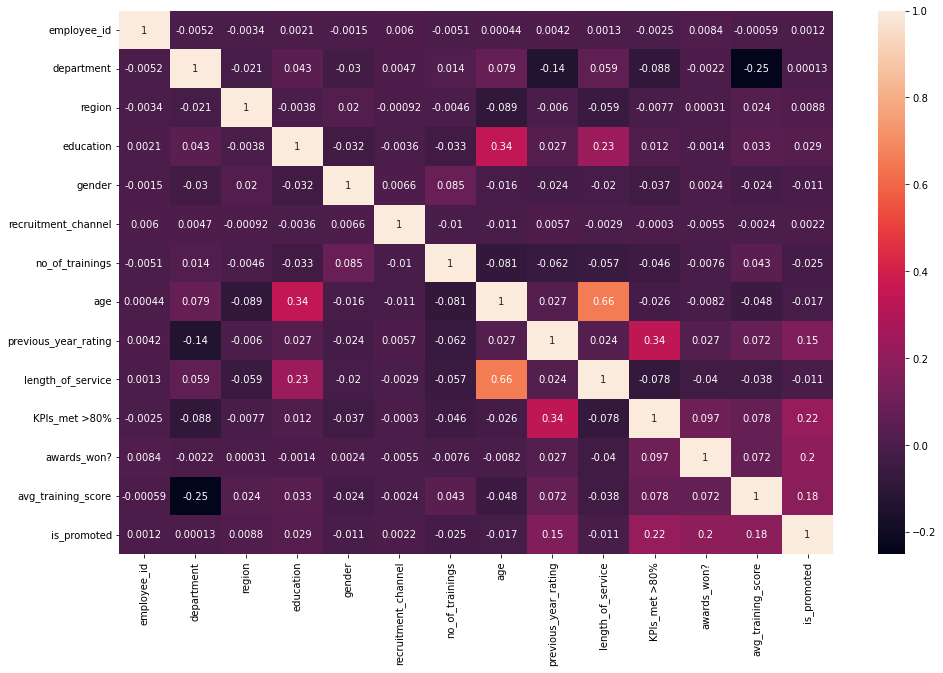

In [22]:
corr = data_tmp.corr()
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr, annot=True);

Column **age** and **length_of_service** are correlated so we will drop this columns

In [23]:
data_tmp.drop('length_of_service',axis=1,inplace=True)
data_tmp.drop('age',axis=1,inplace=True)

In [24]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  float64
 2   region                54808 non-null  float64
 3   education             54808 non-null  float64
 4   gender                54808 non-null  float64
 5   recruitment_channel   54808 non-null  float64
 6   no_of_trainings       54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 5.0 MB


In [25]:
data_tmp.is_promoted.unique()

array([0, 1], dtype=int64)

#### Checking for outliers

With **BoxPlot**

In [26]:
data_tmp.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808.0,4.972796,2.506046,0.0,4.00,5.0,7.0,8.0
region,54808.0,15.428970,8.764954,0.0,11.00,14.0,21.0,33.0
education,54808.0,0.559316,0.889452,0.0,0.00,0.0,2.0,2.0
gender,54808.0,0.702379,0.457216,0.0,0.00,1.0,1.0,1.0
recruitment_channel,54808.0,0.868158,0.980713,0.0,0.00,0.0,2.0,2.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.00,3.0,4.0,5.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0


In [27]:
data_tmp.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

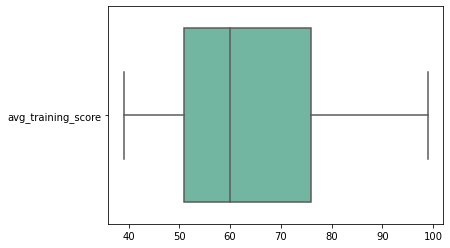

In [28]:
#created various dataframes based on describe function that we make easy to identify outliers
df_1 = data_tmp[['department', 'region', 'education', 'gender',
       'recruitment_channel','KPIs_met >80%']]
df_2 = data_tmp[['avg_training_score']]
df_3 = data_tmp[['no_of_trainings', 'awards_won?', 'is_promoted']]
df_4 = data_tmp[['previous_year_rating']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

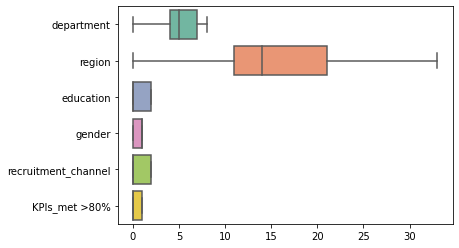

In [29]:
ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

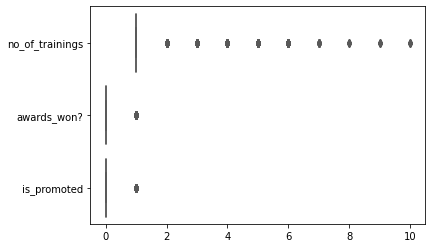

In [30]:
ax = sns.boxplot(data=df_3, orient="h", palette="Set2")

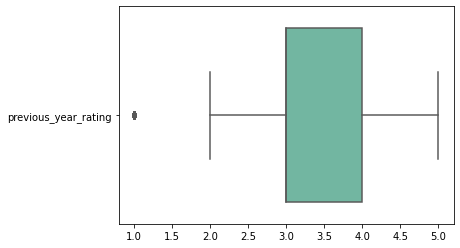

In [31]:
ax = sns.boxplot(data=df_4, orient="h", palette="Set2")

### Modeling

#### Splitting training and validation dataset

In [32]:
from sklearn.model_selection import train_test_split

#getting X and y
X = data_tmp.drop('is_promoted',axis=1)
y = data_tmp['is_promoted']

#splitting
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, y_train.shape

((43846, 11), (43846,))

In [34]:
X_val.shape, y_val.shape

((10962, 11), (10962,))

#### Scaling our dataset with MinMaxScaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [36]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [37]:
#importing metrics 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [38]:
models = {
    'RandomForest': RandomForestClassifier(),
    'RandomForest1000': RandomForestClassifier(n_estimators=1000),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'ExtraTree': ExtraTreeClassifier(),
    'Kneighbors': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'XGB': XGBClassifier()
}

In [39]:
#helper function for fitting models
def fit_score(models, X_train, X_val, y_train, y_val):
    np.random.seed(42)
    for name, model in models.items():
        model.fit(X_train, y_train) #fitting the model
        score = model.score(X_val, y_val)
        print(f'Accuracy of {name} is {score}')

In [40]:
fit_score(models=models,
          X_train=X_train_scaled,
          X_val=X_val_scaled,
          y_train=y_train,
          y_val=y_val)

Accuracy of RandomForest is 0.9370552818828681
Accuracy of RandomForest1000 is 0.936325488049626
Accuracy of GradientBoosting is 0.939792008757526
Accuracy of AdaBoost is 0.9257434774676154
Accuracy of Bagging is 0.9355044699872286
Accuracy of DecisionTree is 0.8994708994708994
Accuracy of ExtraTree is 0.8950009122422915
Accuracy of Kneighbors is 0.9194490056559023
Accuracy of CatBoost is 0.9435322021528918
Accuracy of XGB is 0.9421638387155629


**RandomForest, Catboost and XGB** performs best among these, so now we will perform cross-validation on these and we will checkout other metrics too

In [41]:
from sklearn.model_selection import cross_val_score

#RandomForestClassifier
random_cross_accuracy = cross_val_score(RandomForestClassifier(random_state=42),X,y,cv=5).mean()
random_cross_precision = cross_val_score(RandomForestClassifier(random_state=42),X,y,cv=5,scoring='precision').mean()
random_cross_f1= cross_val_score(RandomForestClassifier(random_state=42),X,y,cv=5,scoring='f1').mean()

In [42]:
#CatBoostClassifier
cat_cross_accuracy = cross_val_score(CatBoostClassifier(random_state=42,silent=True),X,y,cv=5).mean()
cat_cross_precision = cross_val_score(CatBoostClassifier(random_state=42,silent=True),X,y,cv=5,scoring='precision').mean()
cat_cross_f1= cross_val_score(CatBoostClassifier(random_state=42,silent=True),X,y,cv=5,scoring='f1').mean()

In [43]:
#XGBClassifier
xgb_cross_accuracy = cross_val_score(XGBClassifier(random_state=42),X,y,cv=5).mean()
xgb_cross_precision = cross_val_score(XGBClassifier(random_state=42),X,y,cv=5,scoring='precision').mean()
xgb_cross_f1= cross_val_score(XGBClassifier(random_state=42),X,y,cv=5,scoring='f1').mean()

In [44]:
#let's make dataframe
index = ['RandomForest', 'CatBoost', 'XGB']
accuracy = [random_cross_accuracy, cat_cross_accuracy, xgb_cross_accuracy]
precision = [random_cross_precision, cat_cross_precision, xgb_cross_precision]
f1 = [random_cross_f1, cat_cross_f1, xgb_cross_f1]

cv_metrics = pd.DataFrame(index=index)
cv_metrics['Accuracy'] = accuracy
cv_metrics['Precision'] = precision
cv_metrics['F1'] = f1

In [45]:
cv_metrics

,Accuracy,Precision,F1
RandomForest,0.934444,0.798954,0.444743
CatBoost,0.942143,0.924528,0.506760
XGB,0.941122,0.901243,0.500557


Our evaluation metrics for this competition is **F1** so we can see **CatBoostClassifier** performs well compare to all other models.

In [46]:
model = CatBoostClassifier(silent=True,random_state=42)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_val_scaled)

In [47]:
#Classification report
print(classification_report(y_val,preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.93      0.35      0.50       908

    accuracy                           0.94     10962
   macro avg       0.94      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



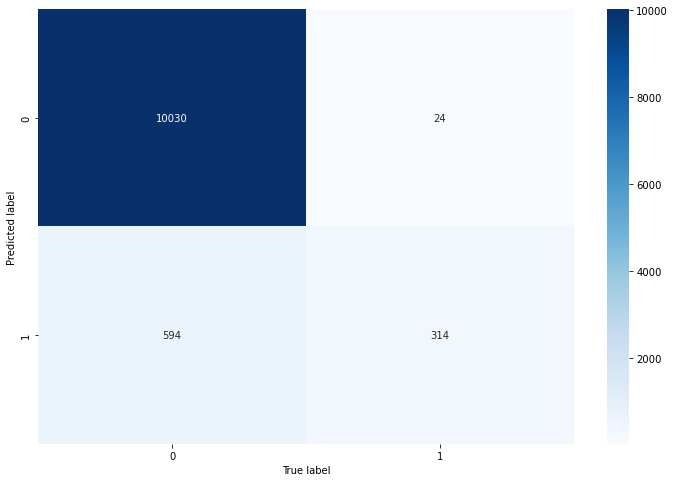

In [48]:
#confusion matrix
conf_matrix = confusion_matrix(y_val, preds)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set(xlabel='True label',ylabel='Predicted label');

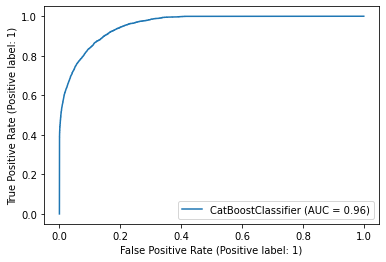

In [49]:
#roc_auc_curve
plot_roc_curve(model,X_train_scaled,y_train);

#### Handling imbalanced dataset

After watching classification report we have seen that we have imbalanced dataset, so now will we handle this problem.

In [5]:
from imblearn.combine import SMOTETomek

In [69]:
smk = SMOTETomek(random_state=42)
X_balanced, y_balanced = smk.fit_resample(X,y)

In [70]:
#shape before handling imbalanced data
X.shape, y.shape

((54808, 11), (54808,))

In [71]:
#shape after handling imbalanced data
X_balanced.shape, y_balanced.shape

((95852, 11), (95852,))

#### Splitting our data

In [72]:
#splitting
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X_balanced,y_balanced, test_size=0.2, random_state=42)

In [73]:
X_train_bal.shape, y_train_bal.shape

((76681, 11), (76681,))

In [74]:
X_val_bal.shape, y_val_bal.shape

((19171, 11), (19171,))

#### Scaling our data

In [75]:
scaler = MinMaxScaler()
scaler.fit(X_train_bal)
X_train_scaled_bal = scaler.transform(X_train_bal)
X_val_scaled_bal = scaler.transform(X_val_bal)

#### Fitting our CatBoostClassifier with this balanced data



In [76]:
model_1 = CatBoostClassifier(random_state=42, silent=True)
model_1.fit(X_train_scaled_bal, y_train_bal)

In [77]:
#Predicitng
preds_1 = model_1.predict(X_val_scaled_bal)

In [78]:
print(classification_report(y_val_bal, preds_1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9614
           1       1.00      0.94      0.96      9557

    accuracy                           0.97     19171
   macro avg       0.97      0.97      0.97     19171
weighted avg       0.97      0.97      0.97     19171



In [79]:
cat_cross_bal_f1= cross_val_score(CatBoostClassifier(random_state=42,silent=True),X_balanced,y_balanced,cv=5,scoring='f1').mean()

In [80]:
cat_cross_bal_f1

0.9448864949283374

So now we can see we get **F1 score = 0.94** on balanced data, so now we will make predictions on test data.

### Importing test data

In [83]:
test_data = pd.read_csv('test.csv')

In [84]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [85]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


Let's preprocess our test data

In [88]:
def preprocess(data):
    category_columns=data.select_dtypes(include=['object']).columns.tolist()
    numerical_columns=data.select_dtypes(include=['int64','float64']).columns.tolist()

    for column in data:
        if data[column].isnull().any():
            if(column in category_columns):
                data[column]=data[column].fillna(data[column].mode()[0])
            else:
                data[column]=data[column].fillna(data[column].median())
    
    scaler = OrdinalEncoder()

    data[category_columns] = scaler.fit_transform(data[category_columns])
    
    data.drop('length_of_service',axis=1,inplace=True)
    data.drop('age',axis=1,inplace=True)
    
    

In [89]:
preprocess(test_data)

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  float64
 2   region                23490 non-null  float64
 3   education             23490 non-null  float64
 4   gender                23490 non-null  float64
 5   recruitment_channel   23490 non-null  float64
 6   no_of_trainings       23490 non-null  int64  
 7   previous_year_rating  23490 non-null  float64
 8   KPIs_met >80%         23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.0 MB


In [91]:
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Predicting on test data

In [93]:
test_predictions = model_1.predict(test_data)

In [96]:
test_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Saving test data in .csv format

In [97]:
sample = pd.read_csv('sample_submission.csv')

In [98]:
prediction = pd.DataFrame()
prediction['employee_id'] = sample['employee_id']
prediction['is_promoted'] = test_predictions

In [99]:
prediction

,employee_id,is_promoted
0,8724,1
1,74430,1
2,72255,1
3,38562,1
4,64486,1
...,...,...
23485,53478,1
23486,25600,1
23487,45409,1
23488,1186,1


In [101]:
prediction.to_csv('submission_1.csv',index=False)